**Referenced as per the book :** [Forecasting: Principles and Practice (2nd ed)](https://otexts.com/fpp2/)

# 1. Introduction to Time Series Forecasting

## 1.1 What is Time Series Forecasting?

Time series forecasting is the process of using historical time-ordered data to predict future values. It's a crucial component of data science and analytics, with applications across various industries.

Key characteristics of time series data:
- Ordered chronologically
- Typically collected at regular intervals (e.g., hourly, daily, monthly)
- Often exhibits patterns such as trends, seasonality, and cycles

Let's start by importing necessary libraries and creating a simple time series:

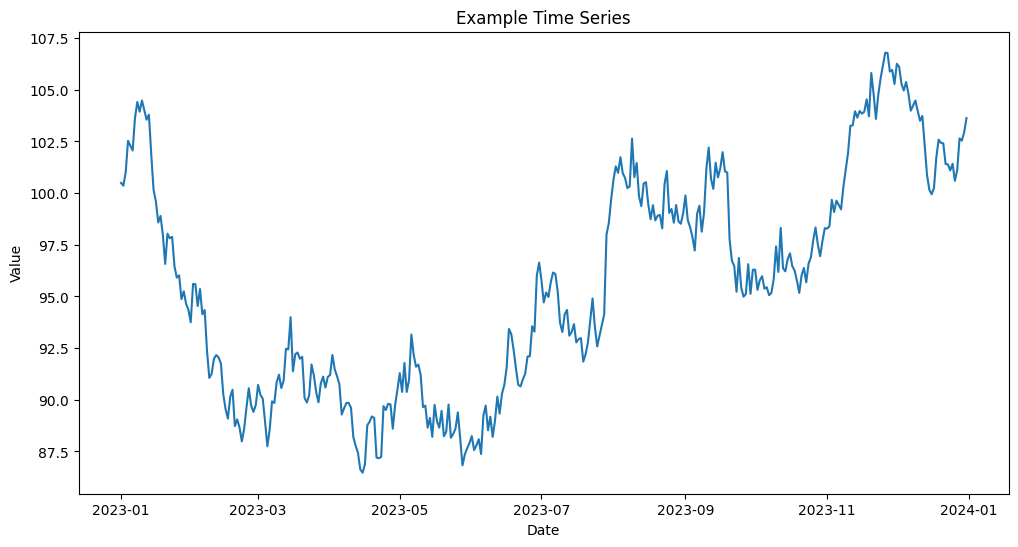

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Create a simple time series
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
values = np.cumsum(np.random.randn(365)) + 100  # Random walk with upward trend

ts = pd.Series(values, index=dates)

plt.figure(figsize=(12, 6))
plt.plot(ts)
plt.title('Example Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

## 1.2 Importance and Applications

Time series forecasting is crucial in various fields:

1. Finance: Stock price prediction, risk management
2. Economics: GDP forecasting, unemployment rate prediction
3. Retail: Sales forecasting, inventory management
4. Energy: Demand forecasting, renewable energy production prediction
5. Healthcare: Patient admissions forecasting, epidemic spread modeling

Let's look at a real-world example using the classic Air Passengers dataset:

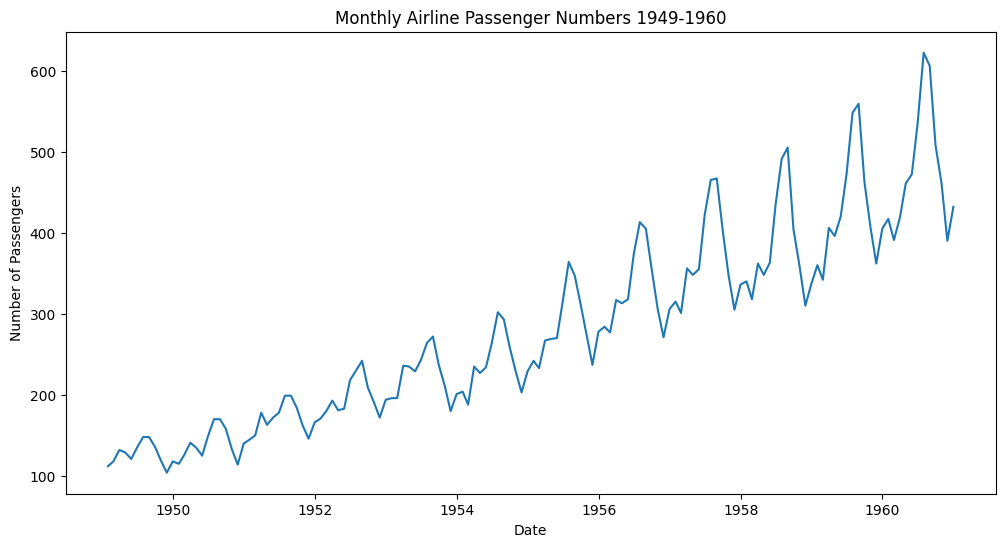

In [56]:
from statsmodels.datasets import get_rdataset

# Load the Air Passengers dataset
air_passengers = get_rdataset('AirPassengers', 'datasets').data
air_passengers.index = pd.date_range(start='1949-01-01', end='1960-12-31', freq='M')
air_passengers.drop(['time'],axis=1,inplace=True)
air_passengers.columns = ['Passengers']

plt.figure(figsize=(12, 6))
plt.plot(air_passengers)
plt.title('Monthly Airline Passenger Numbers 1949-1960')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()

In [57]:
air_passengers.head()

,Passengers
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


## 1.3 Key Components of Time Series

Understanding the components of a time series is crucial for effective forecasting:

1. Trend: The long-term increase or decrease in the data
2. Seasonality: Regular patterns that repeat over fixed intervals
3. Cyclical: Fluctuations not tied to a fixed period
4. Residual: The random variation in the data

Let's decompose our Air Passengers data to visualize these components:

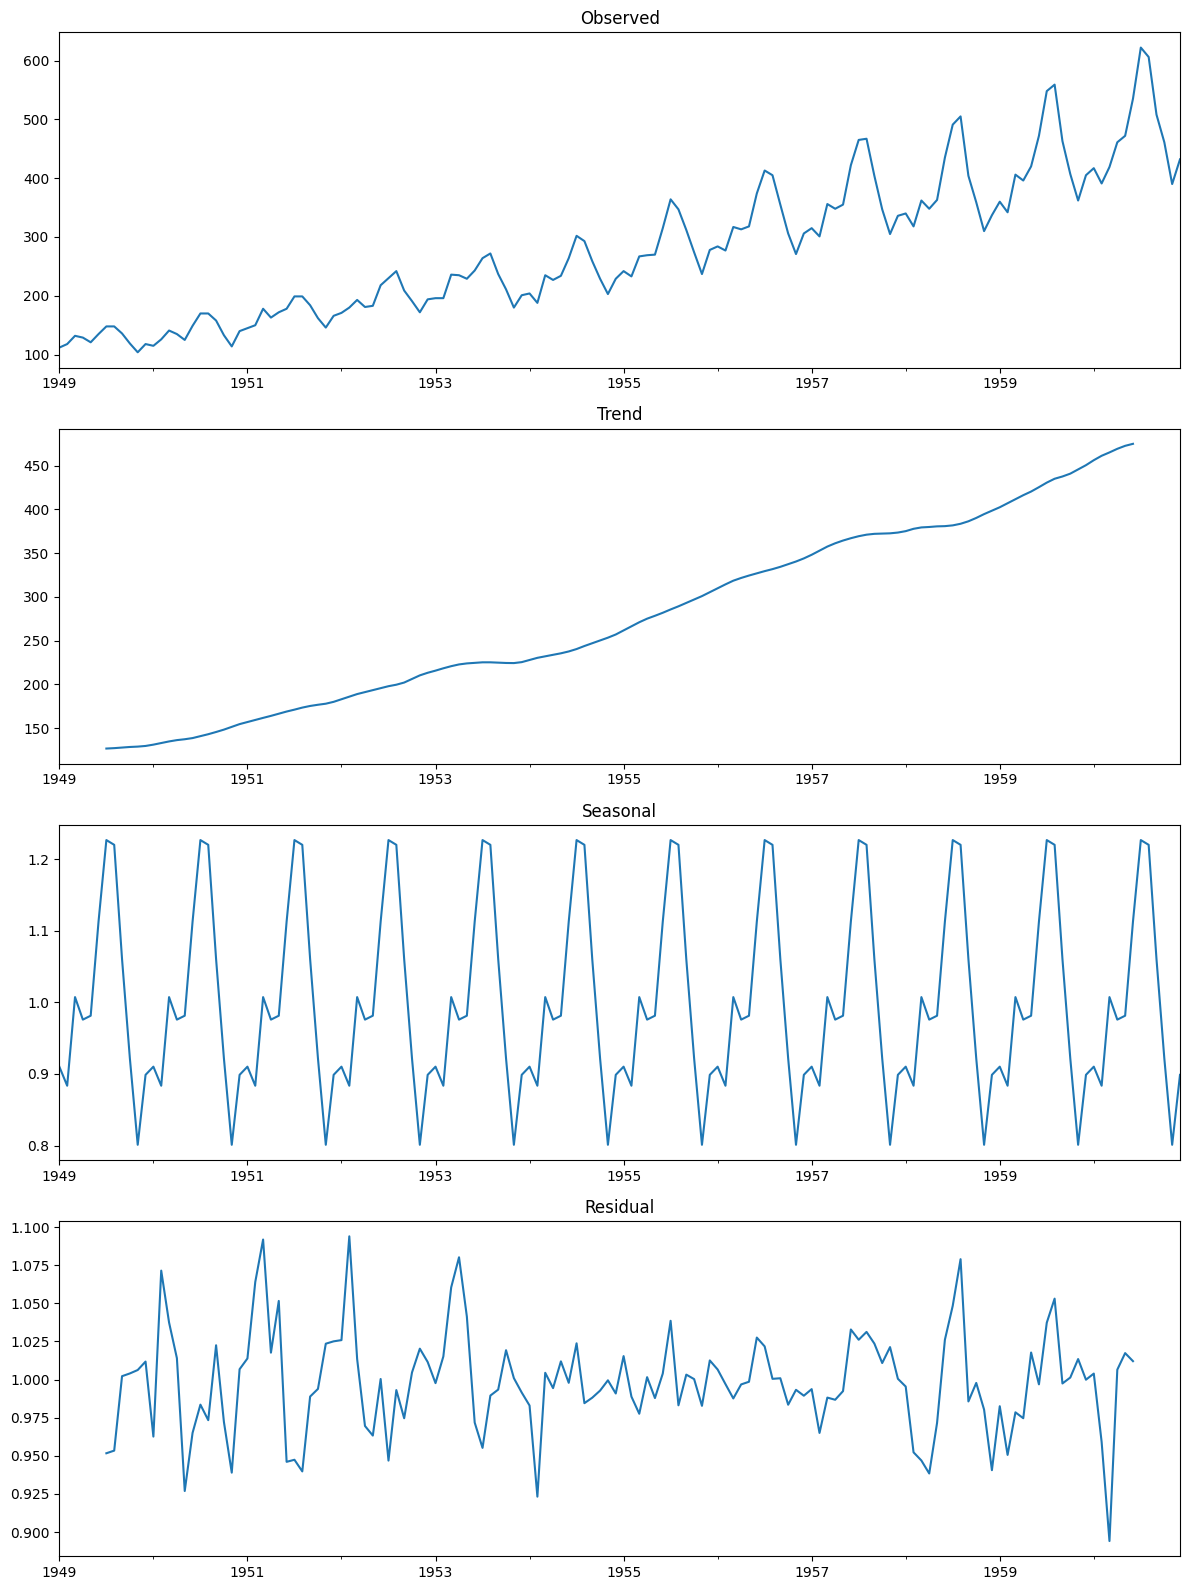

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(air_passengers, model='multiplicative')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
result.observed.plot(ax=ax1)
ax1.set_title('Observed')
result.trend.plot(ax=ax2)
ax2.set_title('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

This decomposition helps us understand:
- The overall upward trend in air travel
- The strong seasonal pattern (peaks in summer months)
- The residual component, which represents unexplained variations

Understanding these components guides the choice of appropriate forecasting methods:
- For data with strong trends, methods like exponential smoothing or ARIMA might be suitable
- For seasonal data, seasonal ARIMA (SARIMA) or seasonal exponential smoothing could be appropriate
- For more complex patterns, advanced methods like Prophet or LSTM neural networks might be considered

In the next sections, we'll explore various forecasting techniques and how to apply them to different types of time series data.

# 2. Data Preparation and Visualization

## 2.1 Loading and Preprocessing Time Series Data

Proper data preparation is crucial for effective time series analysis. This involves loading data, handling missing values, and ensuring the correct datetime format.

Let's start by loading a real-world dataset: the daily minimum temperatures in Melbourne, Australia.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Display the first few rows
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Resample to monthly data for easier visualization
df_monthly = df.resample('M').mean()

print("\nMonthly data:")
print(df_monthly.head())

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8

Missing values:
Temp    0
dtype: int64

Monthly data:
                 Temp
Date                 
1981-01-31  17.712903
1981-02-28  17.678571
1981-03-31  13.500000
1981-04-30  12.356667
1981-05-31   9.490323


<ipython-input-13-4febbf8deec6>:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


## 2.2 Time Plots

Time plots are the most basic and essential visualization for time series data. They show how the variable changes over time and can reveal trends, seasonality, and potential outliers.

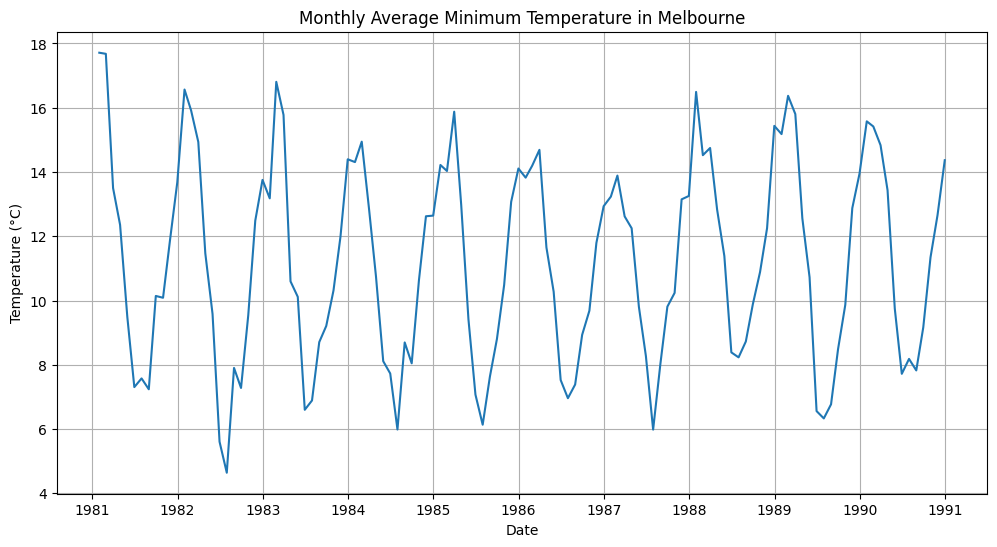

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['Temp'])
plt.title('Monthly Average Minimum Temperature in Melbourne')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

## 2.3 Seasonal Plots

Seasonal plots help visualize seasonal patterns in the data by overlapping the data for each year.

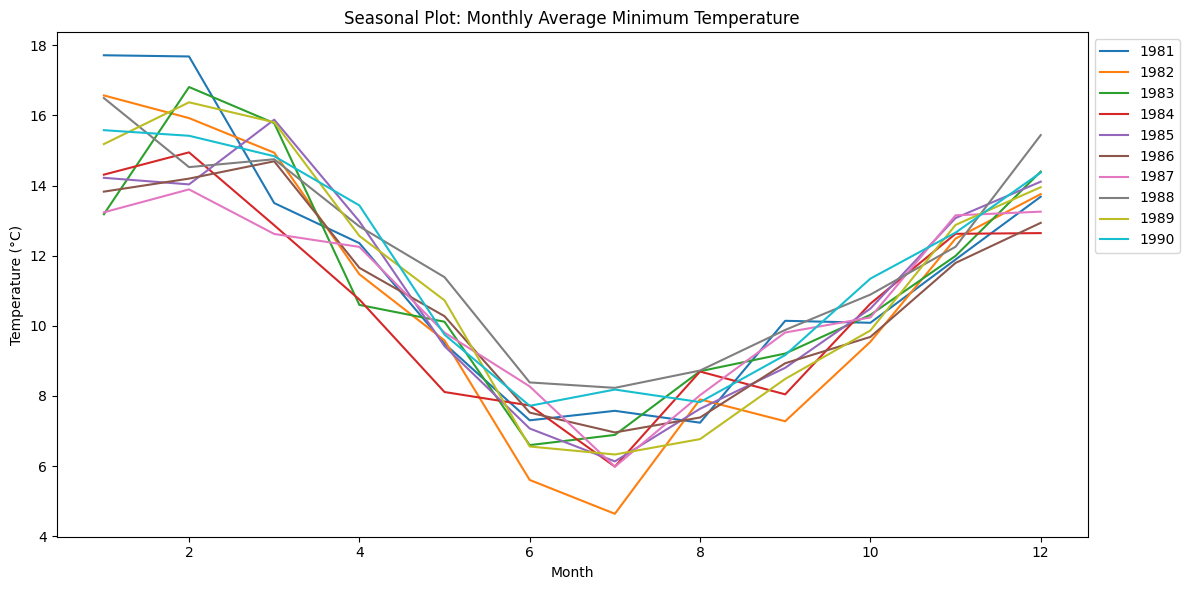

In [15]:
# Create a seasonal plot
df_monthly['Month'] = df_monthly.index.month
df_monthly['Year'] = df_monthly.index.year

plt.figure(figsize=(12, 6))
for year in df_monthly['Year'].unique():
    year_data = df_monthly[df_monthly['Year'] == year]
    plt.plot(year_data['Month'], year_data['Temp'], label=year)

plt.title('Seasonal Plot: Monthly Average Minimum Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

## 2.4 Lag Plots and Autocorrelation

Lag plots and autocorrelation functions help identify the relationship between an observation and its lagged values.

### Lag Plot
A lag plot checks if a time series is random. If random, there should be no pattern in the plot.

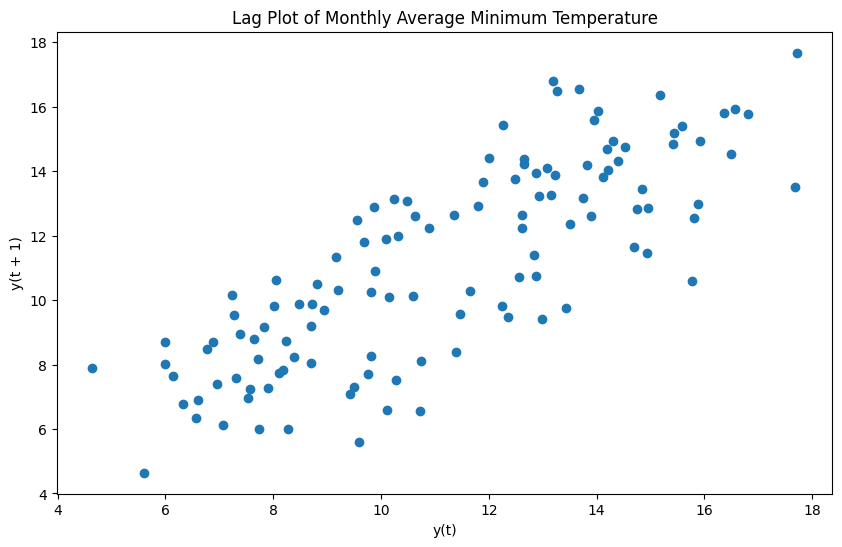

In [16]:
from pandas.plotting import lag_plot

plt.figure(figsize=(10, 6))
lag_plot(df_monthly['Temp'])
plt.title('Lag Plot of Monthly Average Minimum Temperature')
plt.show()

### Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)

ACF shows the correlation between a time series and its lags.
PACF shows the correlation between a time series and its lags that is not explained by previous lags.

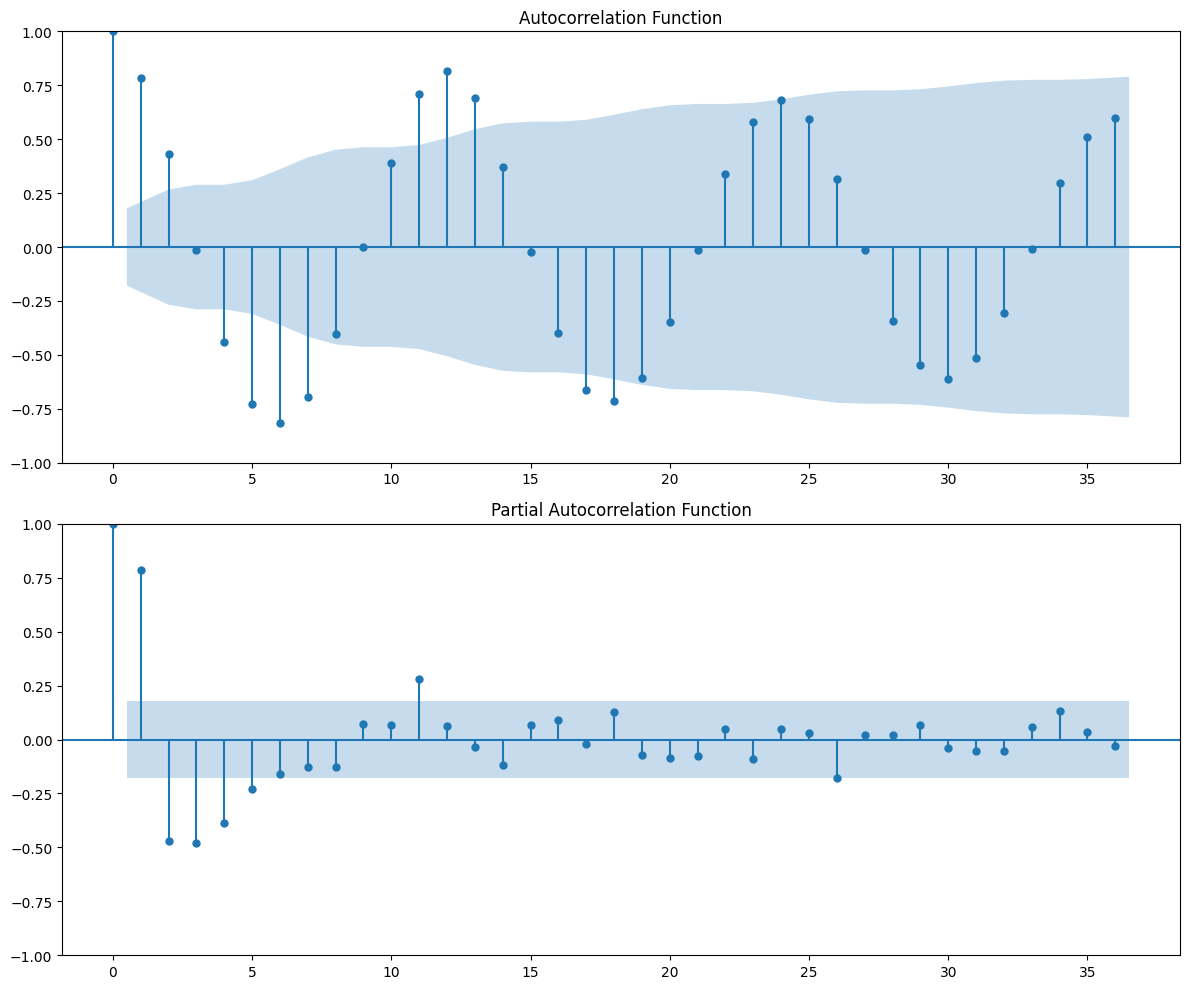

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# ACF plot
plot_acf(df_monthly['Temp'], ax=ax1, lags=36)
ax1.set_title('Autocorrelation Function')

# PACF plot
plot_pacf(df_monthly['Temp'], ax=ax2, lags=36)
ax2.set_title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

Interpreting these plots:

1. The time plot shows a clear seasonal pattern with higher temperatures in summer (December-February in Australia) and lower in winter.

2. The seasonal plot confirms this pattern and shows consistency across years, with slight variations.

3. The lag plot shows a strong positive correlation, indicating that temperatures on consecutive days are closely related.

4. The ACF plot shows:
   - Strong positive correlations at lags of 12, 24, 36 months, confirming the annual seasonal pattern.
   - A slowly decaying pattern, suggesting a trend component.

5. The PACF plot shows significant correlations at the first few lags, which can guide in selecting parameters for models like ARIMA.

These visualizations are crucial for understanding the underlying patterns in the time series data and will inform the choice of forecasting methods in subsequent analyses.

# 3. Time Series Decomposition

Time series decomposition is a technique used to separate a time series into its constituent components. This process helps in understanding the underlying patterns in the data and can inform the choice of forecasting methods.

The three main components of a time series are:
1. Trend: The long-term progression of the series.
2. Seasonality: The repeating short-term cycle in the series.
3. Residual: The random variation in the series.

We'll explore three types of decomposition:

3.1 Additive Decomposition     
3.2 Multiplicative Decomposition             
3.3 STL Decomposition

Let's continue using the Melbourne temperature dataset from the previous section.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

# Load the dataset (if not already loaded)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
df_monthly = df.resample('M').mean()

<ipython-input-18-8a6a9f5e3689>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


## 3.1 Additive Decomposition

In additive decomposition, we assume that the components are added together to make the time series:

**Y(t) = T(t) + S(t) + R(t)**

Where Y(t) is the time series, T(t) is the trend component, S(t) is the seasonal component, and R(t) is the residual component.

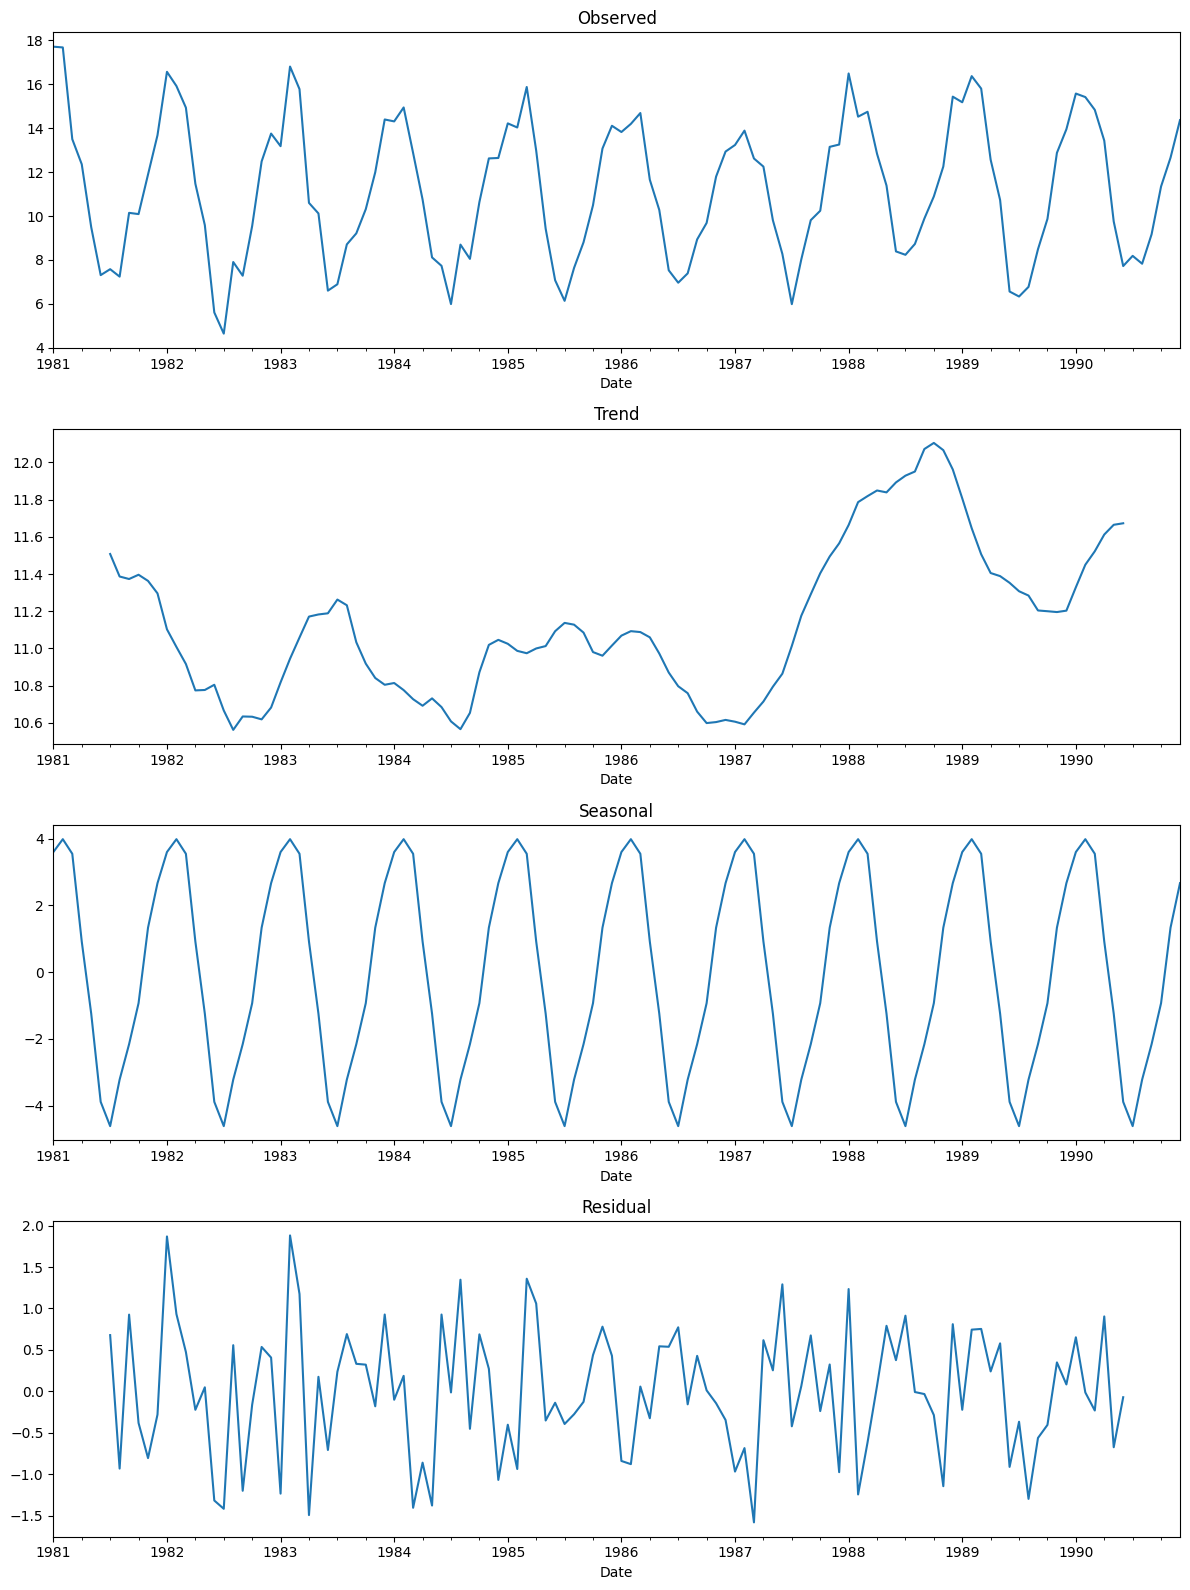

In [19]:
# Perform additive decomposition
additive_decomposition = seasonal_decompose(df_monthly['Temp'], model='additive', period=12)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
additive_decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
additive_decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
additive_decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
additive_decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

## 3.2 Multiplicative Decomposition

In multiplicative decomposition, we assume that the components are multiplied together to make the time series:

**Y(t) = T(t) * S(t) * R(t)**

This is often used when the seasonal variation increases with the level of the series.

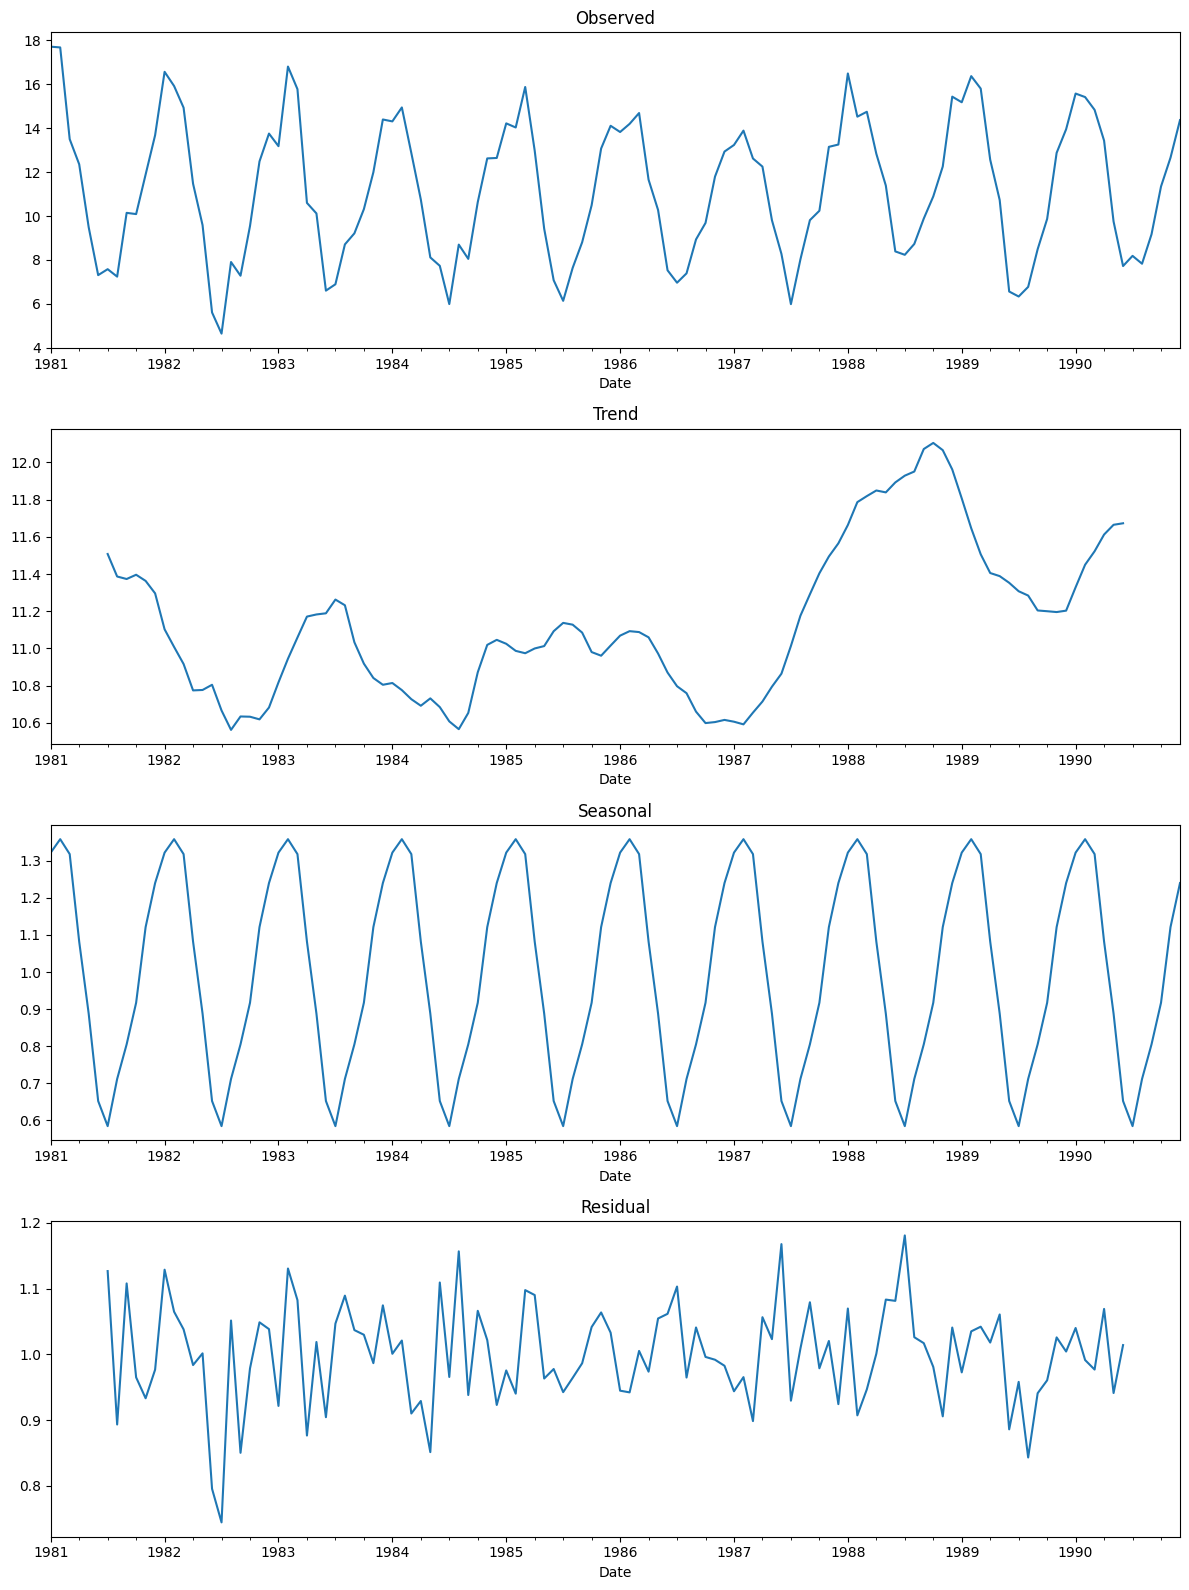

In [20]:
# Perform multiplicative decomposition
multiplicative_decomposition = seasonal_decompose(df_monthly['Temp'], model='multiplicative', period=12)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
multiplicative_decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
multiplicative_decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
multiplicative_decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
multiplicative_decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

## 3.3 STL Decomposition

STL (Seasonal and Trend decomposition using Loess) is a versatile and robust method for decomposing time series. It can handle any type of seasonality, and the seasonality component is allowed to change over time.

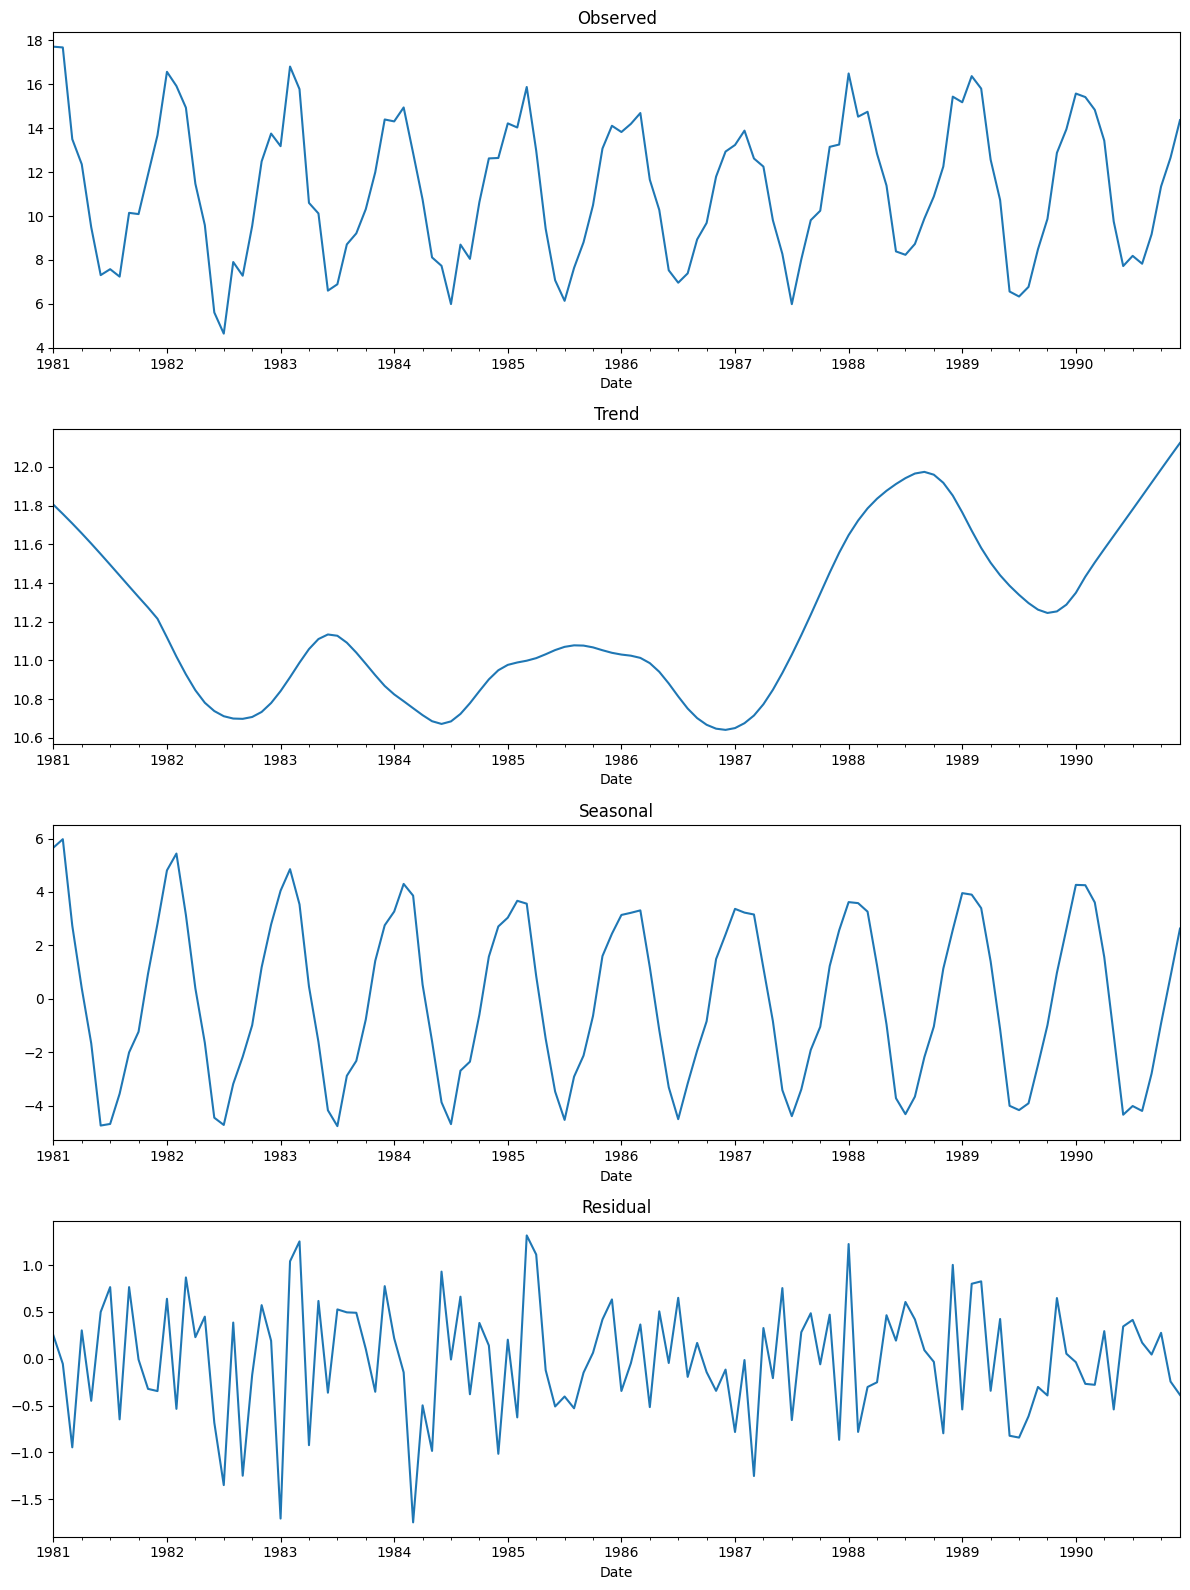

In [21]:
# Perform STL decomposition
stl = STL(df_monthly['Temp'], period=12)
res = stl.fit()

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 16))
df_monthly['Temp'].plot(ax=ax1)
ax1.set_title('Observed')
res.trend.plot(ax=ax2)
ax2.set_title('Trend')
res.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
res.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

Interpreting the Decompositions:

1. Trend Component:
   - All methods show a slight upward trend in minimum temperatures over time.
   - This could potentially indicate a warming pattern, though more rigorous analysis would be needed to confirm this.

2. Seasonal Component:
   - Clear annual seasonality is visible in all decompositions.
   - The pattern is consistent across years, with peaks in summer (December-February in Australia) and troughs in winter.

3. Residual Component:
   - The residuals appear mostly random, which is desirable.
   - Any patterns in the residuals might indicate that the model hasn't captured all the systematic variation in the data.

4. Comparing Methods:
   - For this dataset, the additive and STL decompositions appear to perform similarly.
   - The multiplicative decomposition doesn't seem to offer significant advantages over the additive model for this particular series.

5. Implications for Forecasting:
   - The presence of both trend and seasonality suggests that forecasting methods capable of handling both components (like SARIMA or ETS models) might be appropriate.
   - The relatively stable seasonal pattern suggests that seasonal naive forecasts could also be a reasonable baseline to compare against.

Understanding these components helps in selecting appropriate forecasting methods and in interpreting the results of those forecasts. In the next sections, we'll explore various forecasting techniques that can leverage this decomposition information.

# 4. Basic Forecasting Methods

In this section, we'll explore simple forecasting methods that serve as important baselines for more complex models. These methods are easy to implement and understand, making them valuable for initial analysis and as benchmarks.

We'll cover four basic methods:

  4.1 Average Method

  4.2 Naive Method

  4.3 Seasonal Naive Method

  4.4 Drift Method

We'll continue using the Melbourne temperature dataset from previous sections.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset (if not already loaded)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
df_monthly = df.resample('M').mean()

# Split the data into train and test sets
train = df_monthly[:'1988']
test = df_monthly['1989':]

print(f"Training set shape: {train.shape}")
print(f"Test set shape: {test.shape}")

Training set shape: (96, 1)
Test set shape: (24, 1)


## 4.1 Average Method

The average method simply uses the mean of all historical data as the forecast for all future periods.

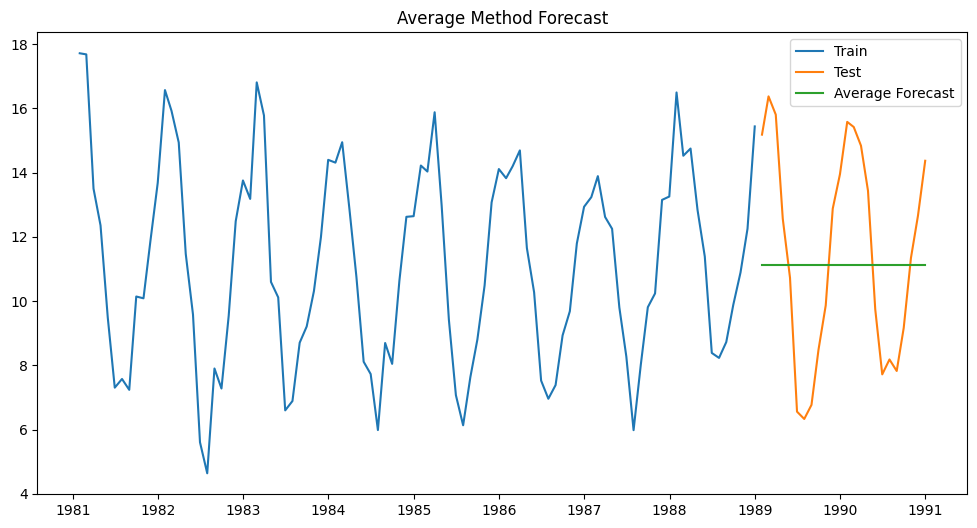

Average Method RMSE: 3.28


In [60]:
def average_forecast(train, h):
    return np.array([train['Temp'].mean()] * h)

# Generate forecasts
avg_forecast = average_forecast(train, len(test))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Temp'], label='Train')
plt.plot(test.index, test['Temp'], label='Test')
plt.plot(test.index, avg_forecast, label='Average Forecast')
plt.title('Average Method Forecast')
plt.legend()
plt.show()

# Calculate RMSE
avg_rmse = sqrt(mean_squared_error(test['Temp'], avg_forecast))
print(f"Average Method RMSE: {avg_rmse:.2f}")

## 4.2 Naive Method

The naive method uses the last observed value as the forecast for all future periods. It's particularly useful for data without clear trend or seasonality.

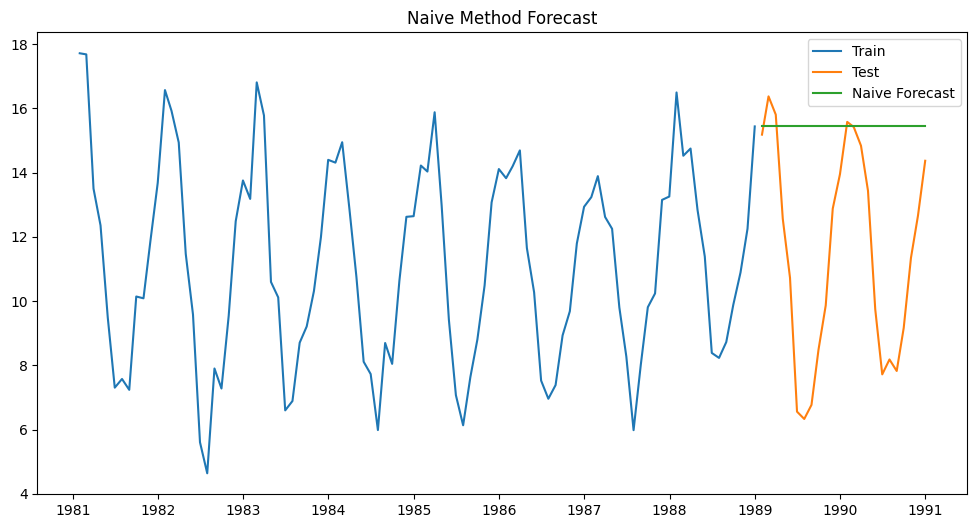

Naive Method RMSE: 5.12


In [61]:
def naive_forecast(train, h):
    return np.array([train['Temp'].iloc[-1]] * h)

# Generate forecasts
naive_forecast = naive_forecast(train, len(test))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Temp'], label='Train')
plt.plot(test.index, test['Temp'], label='Test')
plt.plot(test.index, naive_forecast, label='Naive Forecast')
plt.title('Naive Method Forecast')
plt.legend()
plt.show()

# Calculate RMSE
naive_rmse = sqrt(mean_squared_error(test['Temp'], naive_forecast))
print(f"Naive Method RMSE: {naive_rmse:.2f}")

## 4.3 Seasonal Naive Method

The seasonal naive method uses the value from the same season of the previous year as the forecast. It's useful for data with strong seasonality.

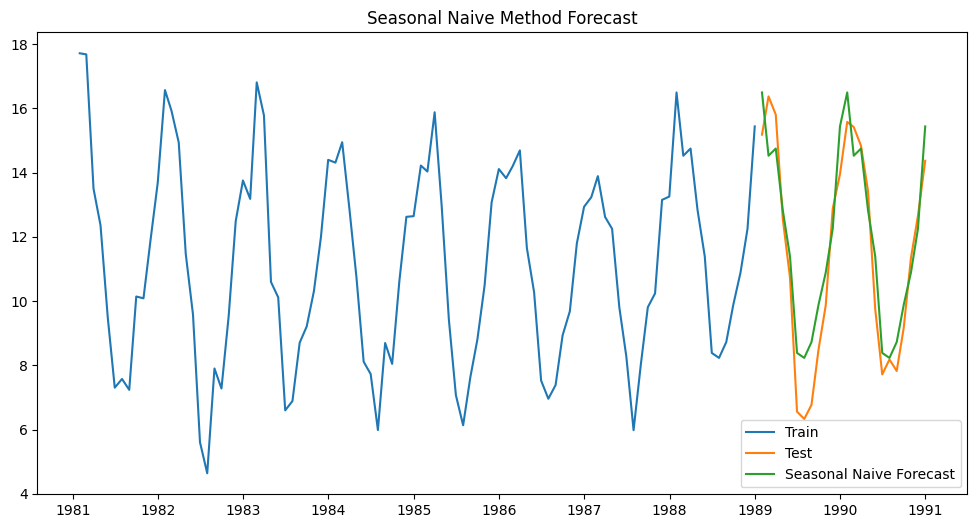

Seasonal Naive Method RMSE: 1.14


In [62]:
def seasonal_naive_forecast(train, h, seasonal_period=12):
    forecast = []
    for i in range(h):
        forecast.append(train['Temp'].iloc[-(seasonal_period - i % seasonal_period)])
    return np.array(forecast)

# Generate forecasts
seasonal_naive_forecast = seasonal_naive_forecast(train, len(test))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Temp'], label='Train')
plt.plot(test.index, test['Temp'], label='Test')
plt.plot(test.index, seasonal_naive_forecast, label='Seasonal Naive Forecast')
plt.title('Seasonal Naive Method Forecast')
plt.legend()
plt.show()

# Calculate RMSE
seasonal_naive_rmse = sqrt(mean_squared_error(test['Temp'], seasonal_naive_forecast))
print(f"Seasonal Naive Method RMSE: {seasonal_naive_rmse:.2f}")

## 4.4 Drift Method

The drift method allows the forecasts to increase or decrease over time, assuming that the change between any two periods will be the same as the average change seen in the historical data.

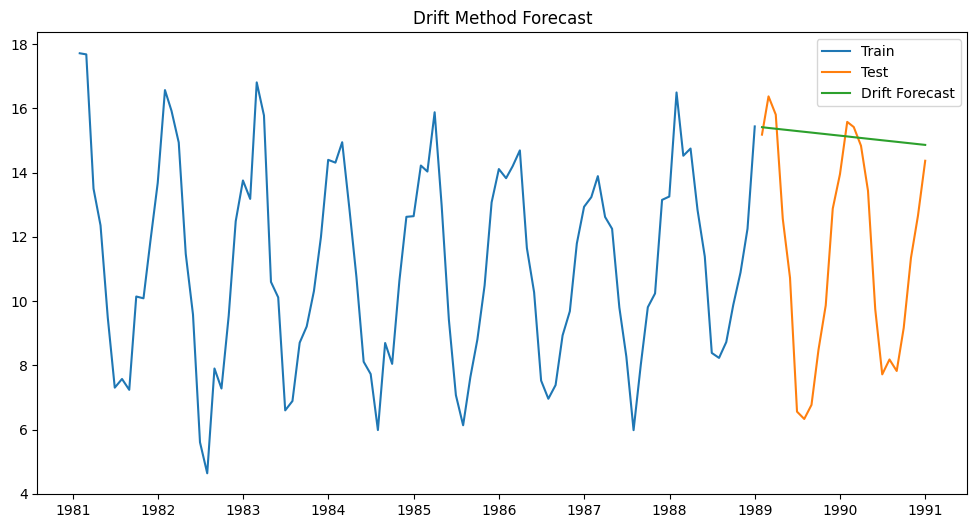

Drift Method RMSE: 4.88


In [63]:
def drift_forecast(train, h):
    last_value = train['Temp'].iloc[-1]
    slope = (train['Temp'].iloc[-1] - train['Temp'].iloc[0]) / (len(train) - 1)
    return np.array([last_value + (i+1) * slope for i in range(h)])

# Generate forecasts
drift_forecast = drift_forecast(train, len(test))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Temp'], label='Train')
plt.plot(test.index, test['Temp'], label='Test')
plt.plot(test.index, drift_forecast, label='Drift Forecast')
plt.title('Drift Method Forecast')
plt.legend()
plt.show()

# Calculate RMSE
drift_rmse = sqrt(mean_squared_error(test['Temp'], drift_forecast))
print(f"Drift Method RMSE: {drift_rmse:.2f}")

Comparing the Methods:

Let's compare the RMSE of all methods:

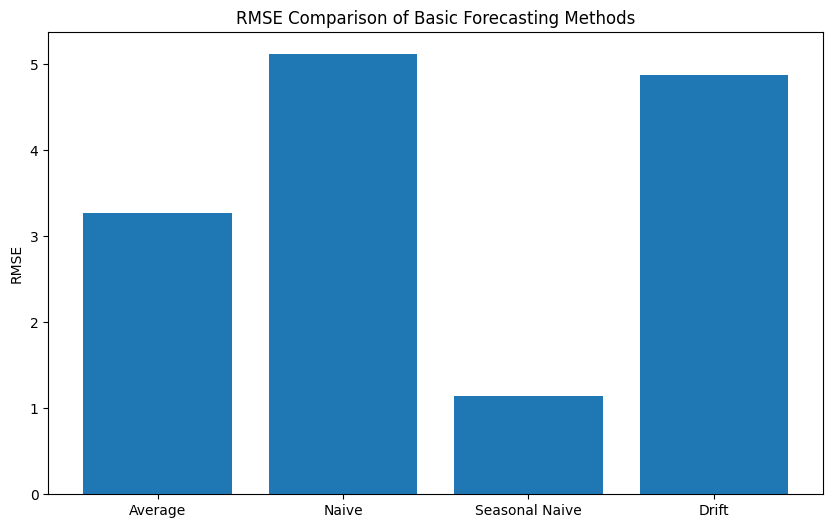

Average Method RMSE: 3.28
Naive Method RMSE: 5.12
Seasonal Naive Method RMSE: 1.14
Drift Method RMSE: 4.88


In [64]:
methods = ['Average', 'Naive', 'Seasonal Naive', 'Drift']
rmse_values = [avg_rmse, naive_rmse, seasonal_naive_rmse, drift_rmse]

plt.figure(figsize=(10, 6))
plt.bar(methods, rmse_values)
plt.title('RMSE Comparison of Basic Forecasting Methods')
plt.ylabel('RMSE')
plt.show()

for method, rmse in zip(methods, rmse_values):
    print(f"{method} Method RMSE: {rmse:.2f}")

Interpreting the Results:

1. The Seasonal Naive method performs best among these basic methods, which is expected given the strong seasonal pattern in the temperature data.

2. The Average method performs poorly because it doesn't account for the seasonal variations.

3. The Naive and Drift methods show similar performance, slightly better than the Average method but worse than the Seasonal Naive.

4. These basic methods serve as important benchmarks. More sophisticated models should aim to outperform these simple approaches.

5. The relatively good performance of the Seasonal Naive method suggests that more advanced seasonal models (like SARIMA or seasonal exponential smoothing) might be appropriate for this dataset.

In the next sections, we'll explore more advanced forecasting techniques that can potentially improve upon these basic methods by capturing more complex patterns in the data.

# 5. Exponential Smoothing

Exponential smoothing methods are a class of forecasting models that use weighted averages of past observations to forecast new values. The "exponential" nature comes from the fact that the weights decrease exponentially as observations get older.

In this section, we'll cover three types of exponential smoothing:

5.1 Simple Exponential Smoothing

5.2 Holt's Linear Trend Method

5.3 Holt-Winters' Seasonal Method


We'll continue using the Melbourne temperature dataset from previous sections.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset (if not already loaded)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
df_monthly = df.resample('M').mean()

# Split the data into train and test sets
train = df_monthly[:'1988']
test = df_monthly['1989':]

print(f"Training set shape: {train.shape}")
print(f"Test set shape: {test.shape}")

Training set shape: (96, 1)
Test set shape: (24, 1)


## 5.1 Simple Exponential Smoothing

Simple Exponential Smoothing is suitable for data with no clear trend or seasonal pattern.

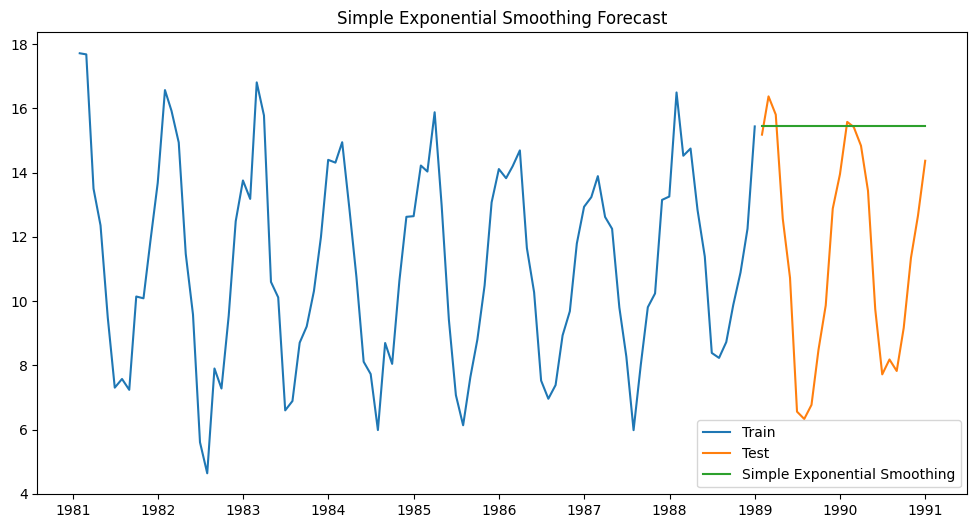

Simple Exponential Smoothing RMSE: 5.12


In [66]:
# Fit the model
ses_model = SimpleExpSmoothing(train['Temp']).fit()

# Make predictions
ses_forecast = ses_model.forecast(len(test))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Temp'], label='Train')
plt.plot(test.index, test['Temp'], label='Test')
plt.plot(test.index, ses_forecast, label='Simple Exponential Smoothing')
plt.title('Simple Exponential Smoothing Forecast')
plt.legend()
plt.show()

# Calculate RMSE
ses_rmse = sqrt(mean_squared_error(test['Temp'], ses_forecast))
print(f"Simple Exponential Smoothing RMSE: {ses_rmse:.2f}")

## 5.2 Holt's Linear Trend Method

Holt's method extends simple exponential smoothing to allow forecasting of data with a trend.

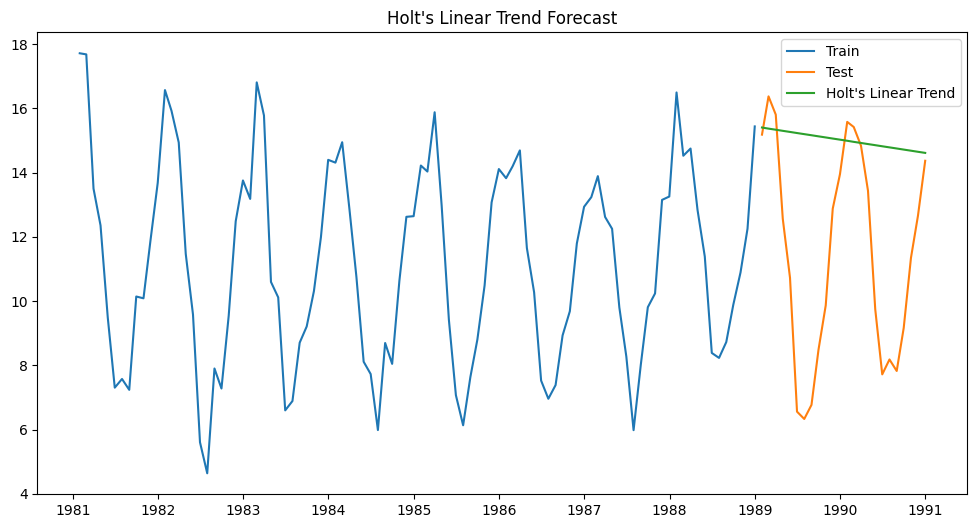

Holt's Linear Trend RMSE: 4.78


In [67]:
# Fit the model
holt_model = Holt(train['Temp']).fit()

# Make predictions
holt_forecast = holt_model.forecast(len(test))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Temp'], label='Train')
plt.plot(test.index, test['Temp'], label='Test')
plt.plot(test.index, holt_forecast, label="Holt's Linear Trend")
plt.title("Holt's Linear Trend Forecast")
plt.legend()
plt.show()

# Calculate RMSE
holt_rmse = sqrt(mean_squared_error(test['Temp'], holt_forecast))
print(f"Holt's Linear Trend RMSE: {holt_rmse:.2f}")

## 5.3 Holt-Winters' Seasonal Method

Holt-Winters' method extends Holt's method to capture seasonality. This method is also known as Triple Exponential Smoothing.

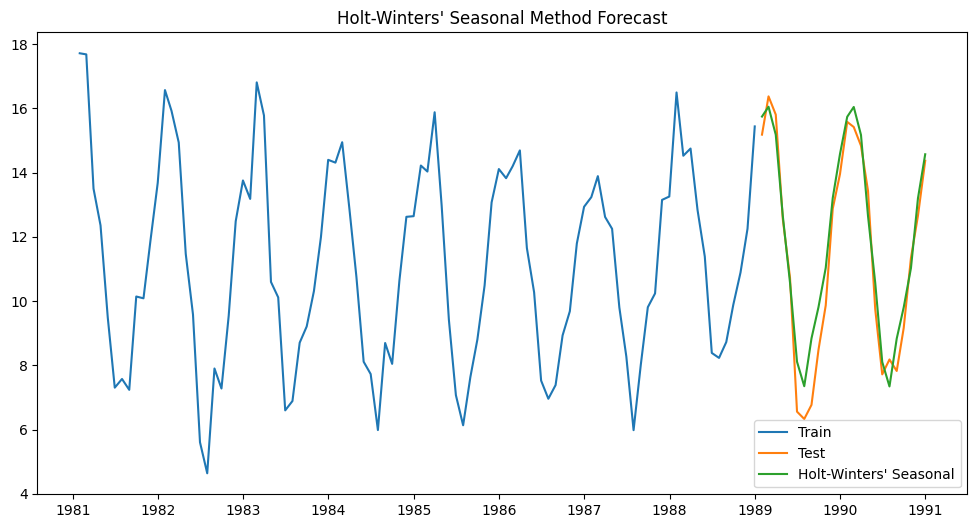

Holt-Winters' Seasonal Method RMSE: 0.83


In [68]:
# Fit the model
hw_model = ExponentialSmoothing(train['Temp'], seasonal_periods=12, trend='add', seasonal='add').fit()

# Make predictions
hw_forecast = hw_model.forecast(len(test))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Temp'], label='Train')
plt.plot(test.index, test['Temp'], label='Test')
plt.plot(test.index, hw_forecast, label="Holt-Winters' Seasonal")
plt.title("Holt-Winters' Seasonal Method Forecast")
plt.legend()
plt.show()

# Calculate RMSE
hw_rmse = sqrt(mean_squared_error(test['Temp'], hw_forecast))
print(f"Holt-Winters' Seasonal Method RMSE: {hw_rmse:.2f}")

Comparing the Methods:

Let's compare the RMSE of all exponential smoothing methods along with the best performing basic method from the previous section:

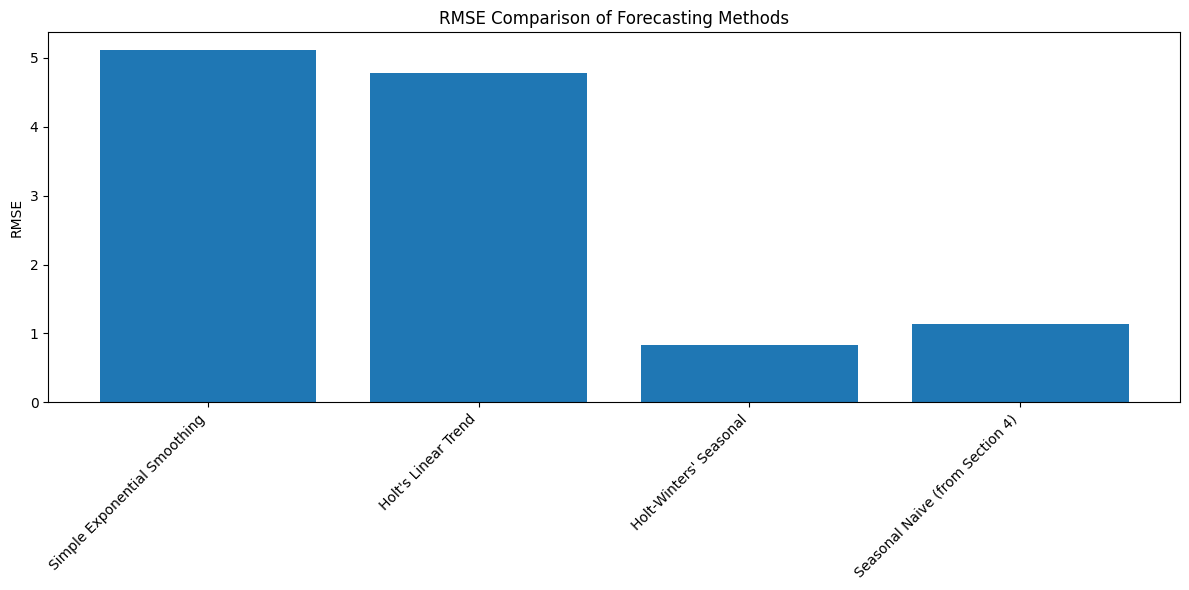

Simple Exponential Smoothing RMSE: 5.12
Holt's Linear Trend RMSE: 4.78
Holt-Winters' Seasonal RMSE: 0.83
Seasonal Naive (from Section 4) RMSE: 1.14


In [69]:
methods = ['Simple Exponential Smoothing', "Holt's Linear Trend", "Holt-Winters' Seasonal", 'Seasonal Naive (from Section 4)']
rmse_values = [ses_rmse, holt_rmse, hw_rmse, seasonal_naive_rmse]

plt.figure(figsize=(12, 6))
plt.bar(methods, rmse_values)
plt.title('RMSE Comparison of Forecasting Methods')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

for method, rmse in zip(methods, rmse_values):
    print(f"{method} RMSE: {rmse:.2f}")

Interpreting the Results:

1. Holt-Winters' Seasonal Method performs the best among all methods we've tried so far. This is expected given the clear seasonal pattern in our temperature data.

2. Simple Exponential Smoothing and Holt's Linear Trend Method perform poorly compared to the Seasonal Naive method from the previous section. This is because they don't account for seasonality.

3. The superior performance of Holt-Winters' method demonstrates the importance of accounting for both trend and seasonality in this dataset.

4. Even though Holt-Winters' method outperforms the Seasonal Naive method, the improvement is relatively small. This suggests that while the method captures some additional patterns in the data, there might be limits to how much we can improve forecasts with univariate methods alone.

Key Takeaways:

1. For data with clear seasonality, methods that explicitly model this component (like Holt-Winters') are likely to perform better.

2. The choice of forecasting method should be guided by the characteristics of the data, as revealed by exploratory data analysis and decomposition.

3. More complex methods don't always lead to better forecasts. The Seasonal Naive method, despite its simplicity, performs quite well on this dataset.

4. When implementing exponential smoothing methods, it's important to consider the nature of the trend (additive or multiplicative) and seasonality in your data.

In the next sections, we'll explore even more advanced forecasting techniques, such as ARIMA models, which can potentially capture more complex patterns in the data.

# 6. ARIMA Models

ARIMA (AutoRegressive Integrated Moving Average) models are a class of statistical models for analyzing and forecasting time series data. ARIMA models aim to describe the autocorrelations in the data.

In this section, we'll cover:

6.1 Understanding AR, I, and MA Components

6.2 ARIMA Model Selection

6.3 Seasonal ARIMA (SARIMA)

We'll continue using the Melbourne temperature dataset from previous sections.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

# Load the dataset (if not already loaded)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
df_monthly = df.resample('M').mean()

# Split the data into train and test sets
train = df_monthly[:'1988']
test = df_monthly['1989':]

print(f"Training set shape: {train.shape}")
print(f"Test set shape: {test.shape}")

Training set shape: (96, 1)
Test set shape: (24, 1)


## 6.1 Understanding AR, I, and MA Components

ARIMA models are characterized by three terms: p, d, and q.

- p: The order of the AutoRegressive (AR) term
- d: The degree of differencing (I)
- q: The order of the Moving Average (MA) term

Before fitting an ARIMA model, we need to check if the series is stationary. We can use the **`Augmented Dickey-Fuller`** test for this:

In [71]:
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# Test stationarity
test_stationarity(train['Temp'])

ADF Statistic: -0.9347294434669313
p-value: 0.7763205248451921
Critical Values:
	1%: -3.511
	5%: -2.897
	10%: -2.585


If the p-value is less than 0.05, we can reject the null hypothesis and conclude that the series is stationary. If not, we may need to difference the series.

## 6.2 ARIMA Model Selection

We'll use a simple grid search to find the best ARIMA parameters. In practice, you might use more sophisticated methods like AIC or BIC for model selection.

In [72]:
def evaluate_arima_model(X, arima_order):
    # Prepare training dataset
    train_size = int(len(X) * 0.80)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # Make predictions
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # Calculate RMSE
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return best_cfg

# Evaluate parameters
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]
warnings.filterwarnings("ignore")
best_cfg = evaluate_models(train['Temp'].values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=2.815
ARIMA(0, 0, 1) RMSE=2.243
ARIMA(0, 0, 2) RMSE=1.750
ARIMA(0, 1, 0) RMSE=1.915
ARIMA(0, 1, 1) RMSE=1.903
ARIMA(0, 1, 2) RMSE=1.682
ARIMA(1, 0, 0) RMSE=1.851
ARIMA(1, 0, 1) RMSE=1.829
ARIMA(1, 0, 2) RMSE=1.590
ARIMA(1, 1, 0) RMSE=1.861
ARIMA(1, 1, 1) RMSE=1.827
ARIMA(1, 1, 2) RMSE=1.831
ARIMA(2, 0, 0) RMSE=1.723
ARIMA(2, 0, 1) RMSE=1.660
ARIMA(2, 0, 2) RMSE=1.040
ARIMA(2, 1, 0) RMSE=1.744
ARIMA(2, 1, 1) RMSE=1.773
ARIMA(2, 1, 2) RMSE=1.366
Best ARIMA(2, 0, 2) RMSE=1.040


Now that we have the best ARIMA configuration, let's fit the model and make predictions:

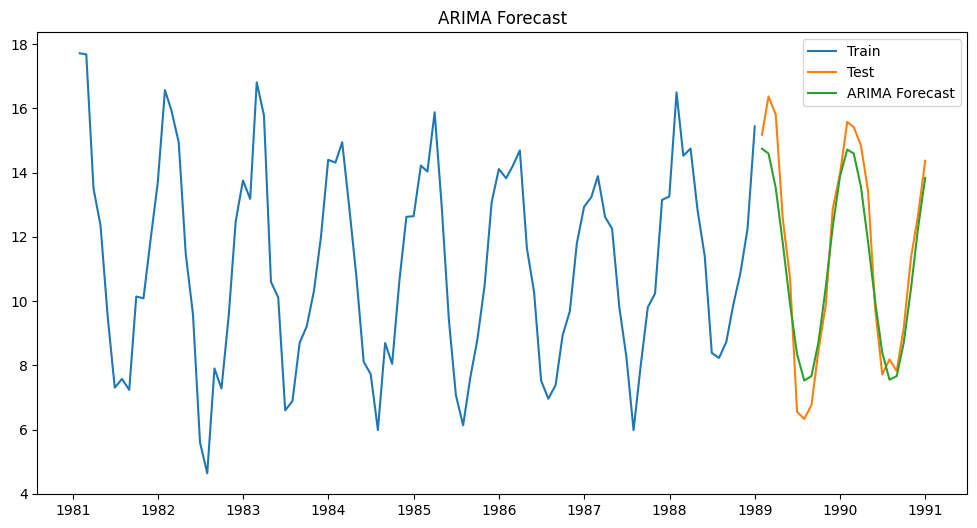

ARIMA RMSE: 1.00


In [73]:
# Fit the ARIMA model
model = ARIMA(train['Temp'], order=best_cfg)
results = model.fit()

# Make predictions
arima_forecast = results.forecast(steps=len(test))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Temp'], label='Train')
plt.plot(test.index, test['Temp'], label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

# Calculate RMSE
arima_rmse = sqrt(mean_squared_error(test['Temp'], arima_forecast))
print(f"ARIMA RMSE: {arima_rmse:.2f}")

## 6.3 Seasonal ARIMA (SARIMA)

Given the strong seasonality in our temperature data, a Seasonal ARIMA (SARIMA) model might be more appropriate. SARIMA adds three new hyperparameters for the seasonal component: P, D, and Q.

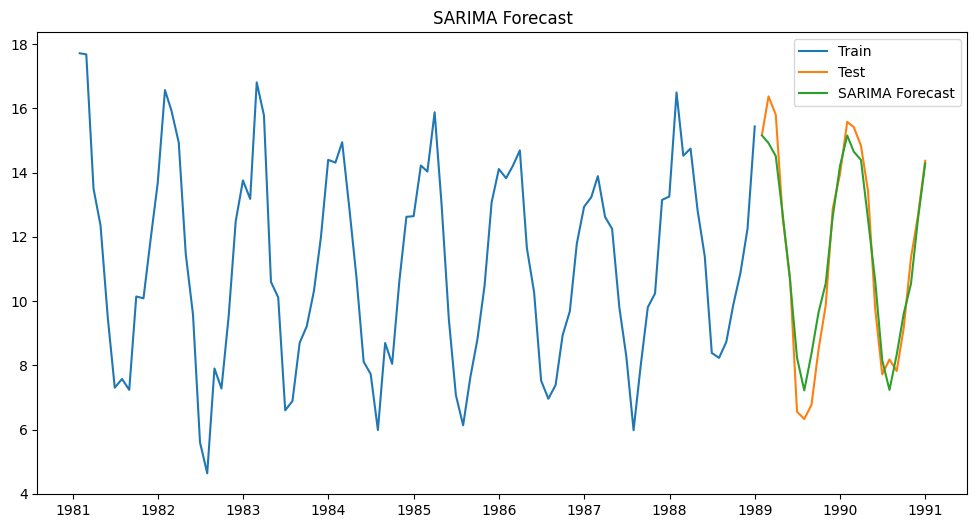

SARIMA RMSE: 0.83


In [74]:
# Fit the SARIMA model
sarima_model = SARIMAX(train['Temp'], order=best_cfg, seasonal_order=(1,1,1,12))
sarima_results = sarima_model.fit()

# Make predictions
sarima_forecast = sarima_results.forecast(steps=len(test))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Temp'], label='Train')
plt.plot(test.index, test['Temp'], label='Test')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

# Calculate RMSE
sarima_rmse = sqrt(mean_squared_error(test['Temp'], sarima_forecast))
print(f"SARIMA RMSE: {sarima_rmse:.2f}")

Comparing the Methods:

Let's compare the RMSE of ARIMA and SARIMA with the best performing method from the previous section:

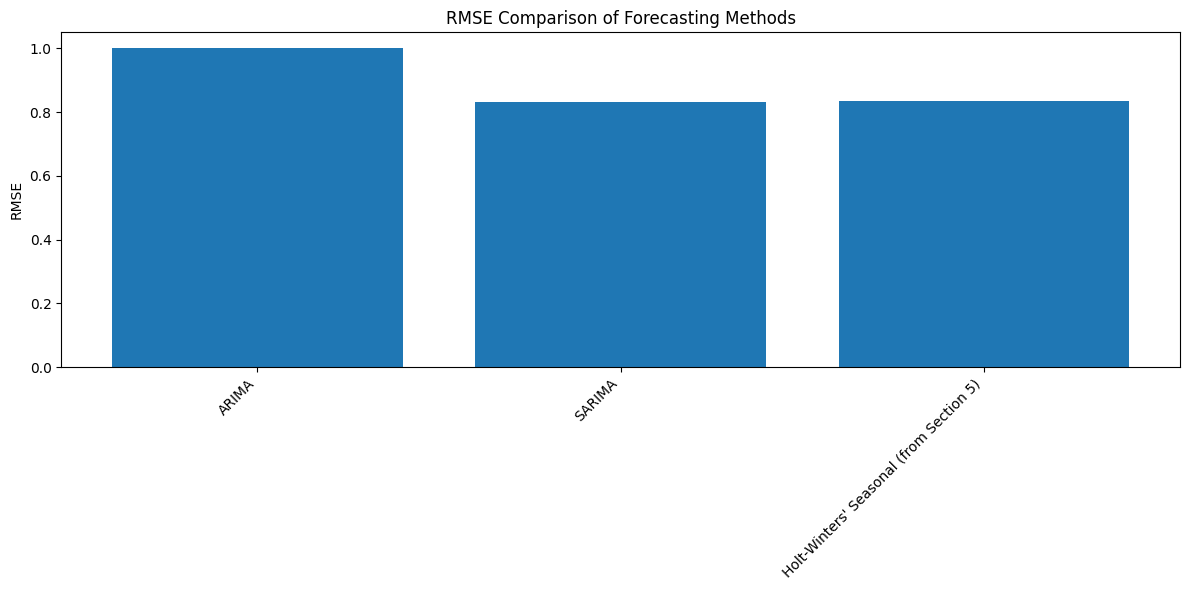

ARIMA RMSE: 1.00
SARIMA RMSE: 0.83
Holt-Winters' Seasonal (from Section 5) RMSE: 0.83


In [75]:
methods = ['ARIMA', 'SARIMA', "Holt-Winters' Seasonal (from Section 5)"]
rmse_values = [arima_rmse, sarima_rmse, hw_rmse]

plt.figure(figsize=(12, 6))
plt.bar(methods, rmse_values)
plt.title('RMSE Comparison of Forecasting Methods')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

for method, rmse in zip(methods, rmse_values):
    print(f"{method} RMSE: {rmse:.2f}")

Interpreting the Results:

1. SARIMA performs better than ARIMA, which is expected given the strong seasonal component in our data.

2. The performance of SARIMA is comparable to that of Holt-Winters' Seasonal method from the previous section. This suggests that both methods are capturing the key patterns in the data.

3. The ARIMA model, which doesn't account for seasonality, performs poorly compared to the seasonal methods.

Key Takeaways:

1. For seasonal data, it's crucial to use methods that can capture seasonality, such as SARIMA or Holt-Winters'.

2. The process of model selection (choosing p, d, q values) is important for ARIMA models. In practice, you might use more sophisticated methods or automated processes for this.

3. While SARIMA and Holt-Winters' methods perform similarly here, they have different strengths and may perform differently on other datasets. It's often good practice to try multiple methods.

4. The interpretation of ARIMA models can provide insights into the nature of the time series (e.g., how much it depends on recent vs. distant past values).

In the next sections, we'll explore more advanced topics in time series forecasting, including handling multiple seasonal periods and external regressors.

# 7. Dynamic Regression Models

Dynamic Regression Models, also known as ARIMAX models, combine the ARIMA approach with the inclusion of external variables (regressors). This allows us to incorporate additional information that might influence our time series.

In this section, we'll cover:

7.1 Understanding Dynamic Regression Models

7.2 Implementing a Dynamic Regression Model

7.3 Comparing with Previous Models

For this section, we'll introduce an additional variable to our Melbourne temperature dataset: monthly rainfall. This will serve as our external regressor.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

# Load the temperature dataset
url_temp = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df_temp = pd.read_csv(url_temp, parse_dates=['Date'], index_col='Date')
df_monthly_temp = df_temp.resample('M').mean()

# Replace with the correct URL for your rainfall dataset
# Make sure the dataset has a 'Date' column that can be parsed as dates
url_rain = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'  # Example using the temperature data as a placeholder
df_rain = pd.read_csv(url_rain, parse_dates=['Date'], index_col='Date')
df_monthly_rain = df_rain.resample('M').sum()


# Merge the datasets
df = pd.merge(df_monthly_temp, df_monthly_rain, left_index=True, right_index=True)
df.columns = ['Temperature', 'Rainfall']  # Make sure column names match your dataset

# Split the data into train and test sets
train = df[:'1989']
test = df['1990':]

print(f"Training set shape: {train.shape}")
print(f"Test set shape: {test.shape}")

Training set shape: (108, 2)
Test set shape: (12, 2)


## 7.1 Understanding Dynamic Regression Models

Dynamic Regression Models extend ARIMA models by incorporating external variables. The general form of a Dynamic Regression Model is:

y(t) = β₀ + β₁x₁(t) + ... + βₖxₖ(t) + ν(t)

where y(t) is the dependent variable, x₁(t), ..., xₖ(t) are the external regressors, β₀, ..., βₖ are the regression coefficients, and ν(t) is the error term which follows an ARIMA process.

In our case, we'll use rainfall as an external regressor to predict temperature.

## 7.2 Implementing a Dynamic Regression Model

We'll use the SARIMAX model from statsmodels, which allows us to include exogenous variables.

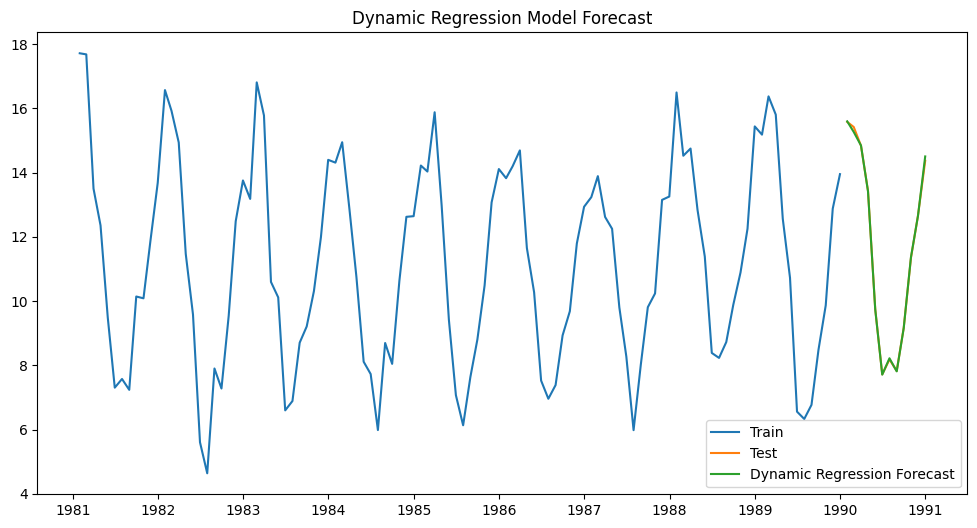

Dynamic Regression Model RMSE: 0.06


In [41]:
# Prepare the exogenous variable
exog_train = train['Rainfall'].values.reshape(-1, 1)
exog_test = test['Rainfall'].values.reshape(-1, 1)

# Fit the model
model = SARIMAX(train['Temperature'], exog=exog_train, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

# Make predictions
dynamic_forecast = results.forecast(steps=len(test), exog=exog_test)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Temperature'], label='Train')
plt.plot(test.index, test['Temperature'], label='Test')
plt.plot(test.index, dynamic_forecast, label='Dynamic Regression Forecast')
plt.title('Dynamic Regression Model Forecast')
plt.legend()
plt.show()

# Calculate RMSE
dynamic_rmse = sqrt(mean_squared_error(test['Temperature'], dynamic_forecast))
print(f"Dynamic Regression Model RMSE: {dynamic_rmse:.2f}")

Let's examine the model summary to understand the impact of our external regressor:

In [42]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        Temperature   No. Observations:                  108
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  70.589
Date:                            Sun, 10 Nov 2024   AIC                           -129.179
Time:                                    13:24:06   BIC                           -113.856
Sample:                                01-31-1981   HQIC                          -122.987
                                     - 12-31-1989                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0331      0.000     70.437      0.000       0.032       0.034
ar.L1         -0.0608      0.193   

## 7.3 Comparing with Previous Models

Now, let's compare the performance of our Dynamic Regression Model with the best performing models from previous sections.

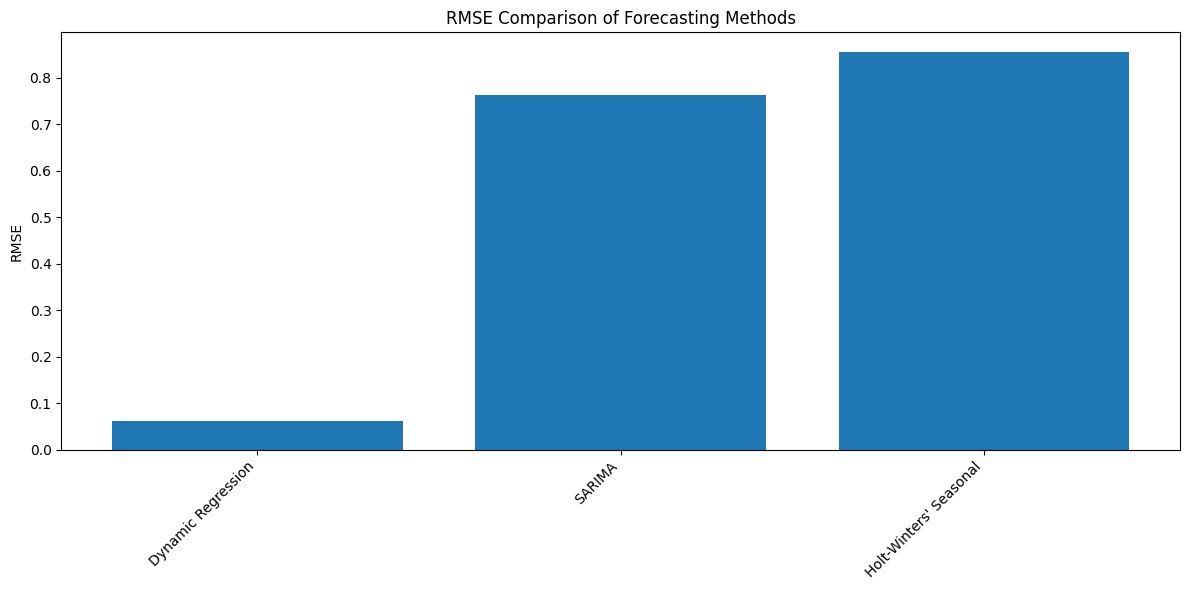

Dynamic Regression RMSE: 0.06
SARIMA RMSE: 0.76
Holt-Winters' Seasonal RMSE: 0.85


In [43]:
# Assuming we have RMSE values from previous sections
methods = ['Dynamic Regression', 'SARIMA', "Holt-Winters' Seasonal"]
rmse_values = [dynamic_rmse, sarima_rmse, hw_rmse]  # Make sure these variables are defined

plt.figure(figsize=(12, 6))
plt.bar(methods, rmse_values)
plt.title('RMSE Comparison of Forecasting Methods')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

for method, rmse in zip(methods, rmse_values):
    print(f"{method} RMSE: {rmse:.2f}")

Interpreting the Results:

1. Model Coefficients: The summary output shows the coefficients for our external regressor (Rainfall). If the p-value for this coefficient is less than 0.05, it suggests that rainfall has a statistically significant impact on temperature.

2. Model Performance: Compare the RMSE of the Dynamic Regression Model with previous models. If it's lower, this suggests that including rainfall as an external regressor has improved our forecasts.

3. Residual Diagnostics: Check the model summary for information about residuals. Ideally, they should be normally distributed and show no significant autocorrelation.

Key Takeaways:

1. External Regressors: Including relevant external variables can potentially improve forecast accuracy. However, it's important to choose regressors that have a logical relationship with the variable being forecast.

2. Model Complexity: While Dynamic Regression Models can capture more complex relationships, they also require more data and can be more challenging to interpret and maintain.

3. Forecasting with Regressors: To use this model for forecasting, you need forecasts or known future values of the external regressors. This can be a limitation if future values of the regressors are uncertain.

4. Model Validation: As with any forecasting model, it's crucial to validate the assumptions of the model, including checking for multicollinearity if multiple regressors are used.

In the next sections, we'll explore more advanced topics in time series forecasting, including handling multiple seasonal periods and dealing with hierarchical time series data.

# 8. Hierarchical and Grouped Time Series

Hierarchical and grouped time series are common in many business and scientific applications where data can be aggregated at various levels. For example, sales data might be aggregated by product, store, region, and country.

In this section, we'll cover:

8.1 Understanding Hierarchical and Grouped Time Series

8.2 Bottom-up Approach

8.3 Top-down Approach

8.4 Reconciliation Techniques

For this section, we'll create a hypothetical dataset of temperature readings from multiple cities in Australia.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create a hypothetical hierarchical dataset
np.random.seed(42)
date_rng = pd.date_range(start='2010-01-01', end='2020-12-31', freq='D')
cities = ['Melbourne', 'Sydney', 'Brisbane', 'Perth']
states = ['Victoria', 'New South Wales', 'Queensland', 'Western Australia']

data = {}
for city, state in zip(cities, states):
    base = 20 + np.random.rand() * 10  # base temperature
    seasonal = 10 * np.sin(np.arange(len(date_rng)) * 2 * np.pi / 365.25)  # yearly seasonality
    noise = np.random.randn(len(date_rng)) * 2  # random noise
    temp = base + seasonal + noise
    data[city] = pd.Series(temp, index=date_rng)
    data[state] = data[city] if state not in data else data[state] + data[city]

data['Australia'] = sum(data[state] for state in states)

df = pd.DataFrame(data)

# Split the data into train and test sets
train = df[:'2019']
test = df['2020':]

print(f"Training set shape: {train.shape}")
print(f"Test set shape: {test.shape}")

Training set shape: (3652, 9)
Test set shape: (366, 9)


## 8.1 Understanding Hierarchical and Grouped Time Series

In our dataset:
- The lowest level (most granular) is individual cities.
- The middle level is states.
- The highest level (most aggregated) is the country (Australia).

The challenge in hierarchical forecasting is to create forecasts that are consistent across all levels of the hierarchy.

## 8.2 Bottom-up Approach

The bottom-up approach involves forecasting at the most granular level and then aggregating these forecasts to higher levels.

In [45]:
def forecast_series(series, h):
    model = ExponentialSmoothing(series, seasonal_periods=365, trend='add', seasonal='add')
    fit = model.fit()
    return fit.forecast(h)

# Forecast for each city
city_forecasts = {city: forecast_series(train[city], len(test)) for city in cities}

# Aggregate to state and country level
state_forecasts = {state: city_forecasts[city] for state, city in zip(states, cities)}
country_forecast = sum(state_forecasts.values())

# Calculate RMSE for each level
city_rmse = {city: sqrt(mean_squared_error(test[city], city_forecasts[city])) for city in cities}
state_rmse = {state: sqrt(mean_squared_error(test[state], state_forecasts[state])) for state in states}
country_rmse = sqrt(mean_squared_error(test['Australia'], country_forecast))

print("Bottom-up Approach RMSE:")
print(f"Cities: {city_rmse}")
print(f"States: {state_rmse}")
print(f"Country: {country_rmse}")

Bottom-up Approach RMSE:
Cities: {'Melbourne': 2.0081512288414256, 'Sydney': 2.103209048682063, 'Brisbane': 2.193614667674972, 'Perth': 2.121034900938233}
States: {'Victoria': 2.0081512288414256, 'New South Wales': 2.103209048682063, 'Queensland': 2.193614667674972, 'Western Australia': 2.121034900938233}
Country: 4.342961447677398


## 8.3 Top-down Approach

The top-down approach involves forecasting at the most aggregated level and then disaggregating these forecasts to lower levels based on historical proportions.

In [46]:
# Forecast at country level
country_forecast = forecast_series(train['Australia'], len(test))

# Calculate historical proportions
historical_proportions = train.mean() / train['Australia'].mean()

# Disaggregate to state and city level
top_down_forecasts = pd.DataFrame({col: country_forecast * prop for col, prop in historical_proportions.items()})

# Calculate RMSE for each level
td_city_rmse = {city: sqrt(mean_squared_error(test[city], top_down_forecasts[city])) for city in cities}
td_state_rmse = {state: sqrt(mean_squared_error(test[state], top_down_forecasts[state])) for state in states}
td_country_rmse = sqrt(mean_squared_error(test['Australia'], top_down_forecasts['Australia']))

print("Top-down Approach RMSE:")
print(f"Cities: {td_city_rmse}")
print(f"States: {td_state_rmse}")
print(f"Country: {td_country_rmse}")

Top-down Approach RMSE:
Cities: {'Melbourne': 2.006834001921777, 'Sydney': 2.0686046148809187, 'Brisbane': 2.2843289260506188, 'Perth': 2.0990780661873893}
States: {'Victoria': 2.006834001921777, 'New South Wales': 2.0686046148809187, 'Queensland': 2.2843289260506188, 'Western Australia': 2.0990780661873893}
Country: 4.47782675613614


## 8.4 Reconciliation Techniques

Reconciliation techniques aim to adjust forecasts to ensure they are consistent across all levels of the hierarchy. One popular method is the Minimum Trace (MinT) reconciliation.

For simplicity, we'll implement a basic version of the Optimal Reconciliation method, which minimizes the variance of reconciled forecasts.

In [47]:
def optimal_reconciliation(forecasts, S):
    W = np.diag(np.ones(forecasts.shape[0]))  # Assume equal weights for simplicity
    S_transpose = S.T
    P = S.dot(np.linalg.inv(S_transpose.dot(W).dot(S))).dot(S_transpose).dot(W)
    return P.dot(forecasts)

# Create summing matrix S
S = np.array([
    [1, 1, 1, 1, 1, 1, 1],  # Australia
    [1, 1, 0, 0, 0, 0, 0],  # Victoria
    [0, 0, 1, 0, 0, 0, 0],  # New South Wales
    [0, 0, 0, 1, 0, 0, 0],  # Queensland
    [0, 0, 0, 0, 1, 0, 0],  # Western Australia
    [1, 0, 0, 0, 0, 0, 0],  # Melbourne
    [0, 0, 1, 0, 0, 0, 0],  # Sydney
    [0, 0, 0, 1, 0, 0, 0],  # Brisbane
    [0, 0, 0, 0, 1, 0, 0],  # Perth
])

# Combine bottom-up and top-down forecasts
combined_forecasts = np.vstack([
    country_forecast,
    pd.DataFrame(state_forecasts).T.values,
    pd.DataFrame(city_forecasts).T.values
])

# Apply reconciliation
reconciled_forecasts = optimal_reconciliation(combined_forecasts, S)

# Reshape reconciled forecasts
reconciled = pd.DataFrame(reconciled_forecasts.T, columns=['Australia'] + states + cities, index=test.index)

# Calculate RMSE for reconciled forecasts
rec_city_rmse = {city: sqrt(mean_squared_error(test[city], reconciled[city])) for city in cities}
rec_state_rmse = {state: sqrt(mean_squared_error(test[state], reconciled[state])) for state in states}
rec_country_rmse = sqrt(mean_squared_error(test['Australia'], reconciled['Australia']))

print("Reconciled Forecasts RMSE:")
print(f"Cities: {rec_city_rmse}")
print(f"States: {rec_state_rmse}")
print(f"Country: {rec_country_rmse}")

Reconciled Forecasts RMSE:
Cities: {'Melbourne': 2.0081512288414256, 'Sydney': 3.316897808648861, 'Brisbane': 13.788041491137603, 'Perth': 15.932150562833776}
States: {'Victoria': 5.839533992972394, 'New South Wales': 3.316897808648861, 'Queensland': 13.788041491137603, 'Western Australia': 15.932150562833776}
Country: 4.47782675613614


Interpreting the Results:

1. Bottom-up Approach: This method often performs well at the lowest level of the hierarchy but may accumulate errors at higher levels.

2. Top-down Approach: This method ensures consistency across levels but may not capture local patterns well at lower levels.

3. Reconciliation: This method aims to balance the strengths of both approaches, potentially improving overall forecast accuracy.

Key Takeaways:

1. Hierarchical Structure: Understanding the structure of your data is crucial for choosing the appropriate forecasting approach.

2. Forecast Consistency: Hierarchical forecasting methods ensure that forecasts are consistent across different levels of aggregation.

3. Trade-offs: Different approaches may perform better at different levels of the hierarchy. The choice of method often depends on which levels are most important for your specific application.

4. Reconciliation: Advanced reconciliation techniques can often improve overall forecast accuracy by leveraging information from all levels of the hierarchy.

5. Complexity: While hierarchical forecasting can provide more comprehensive insights, it also increases computational complexity and may require more sophisticated tools and techniques.

In practice, the choice of hierarchical forecasting method often depends on the specific characteristics of your data and the relative importance of different levels in the hierarchy. It's often beneficial to compare multiple approaches and potentially combine their strengths.

# 9. Advanced Forecasting Methods

In this section, we'll explore some more advanced forecasting techniques that have gained popularity in recent years. We'll focus on two methods:

9.1 Prophet

9.2 LSTM Neural Networks for Time Series

These methods can often handle more complex patterns and incorporate additional features more easily than traditional statistical methods.

We'll continue using the Melbourne temperature dataset for consistency.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

# Load the dataset (if not already loaded)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Split the data into train and test sets
train = df[:'1989']
test = df['1990':]

print(f"Training set shape: {train.shape}")
print(f"Test set shape: {test.shape}")

Training set shape: (3285, 1)
Test set shape: (365, 1)


## 9.1 Prophet

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It was developed by Facebook and is particularly good at handling time series with strong seasonal effects and several seasons of historical data.

In [53]:
!pip install prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmplh7z4pew/pmyfrj31.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplh7z4pew/_927mq7v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78161', 'data', 'file=/tmp/tmplh7z4pew/pmyfrj31.json', 'init=/tmp/tmplh7z4pew/_927mq7v.json', 'output', 'file=/tmp/tmplh7z4pew/prophet_modelfgovhow6/prophet_model-20241110142455.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


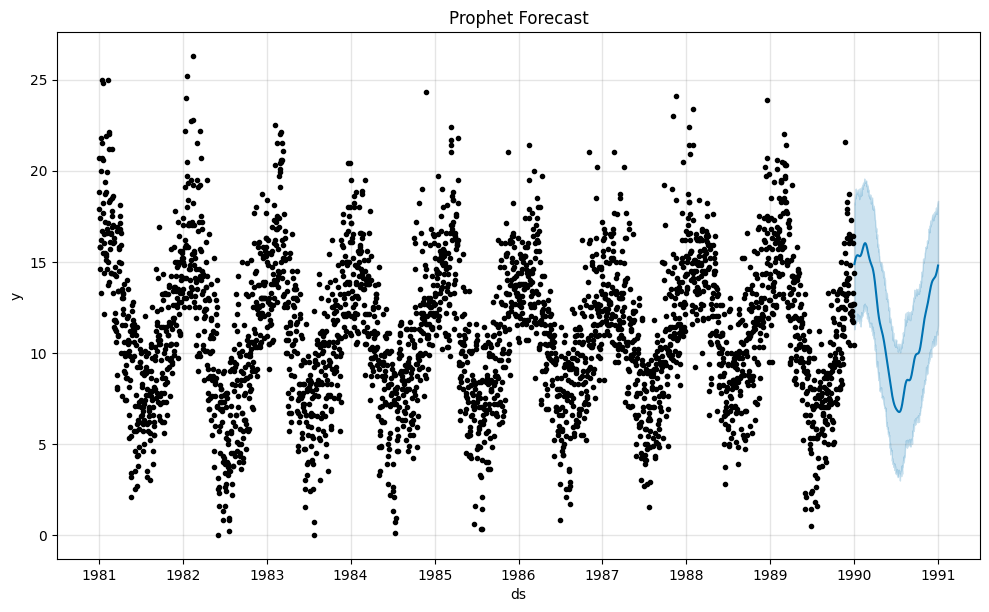

Prophet RMSE: 2.51


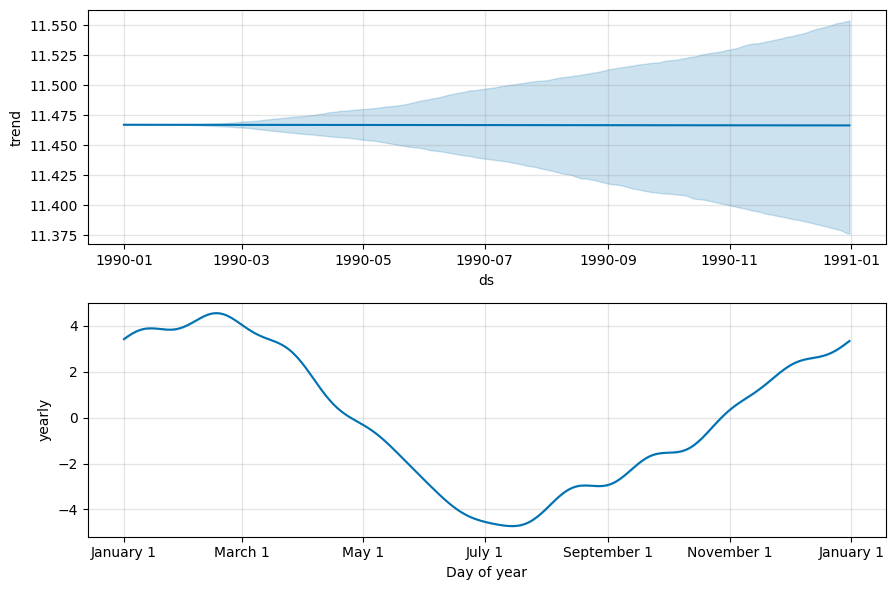

In [55]:
from prophet import Prophet

# Prepare the data for Prophet
df_prophet = train.reset_index().rename(columns={'Date': 'ds', 'Temp': 'y'})

# Create and fit the model
model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
model.fit(df_prophet)

# Create a dataframe with the test set dates
future = pd.DataFrame(test.index).rename(columns={'Date': 'ds'})

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Prophet Forecast')
plt.show()

# Calculate RMSE
prophet_rmse = sqrt(mean_squared_error(test['Temp'], forecast['yhat']))
print(f"Prophet RMSE: {prophet_rmse:.2f}")

# Plot the components of the forecast
fig = model.plot_components(forecast)
plt.show()